### Importação dos dados



In [1]:
import pandas as pd
import glob
import os
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler


## processar todos os CSV e transformá-los em DataFrames usando um FOR.

In [2]:

#  processar todos os CSV e transformá-los em DataFrames do Pandas usando um loop.
for arquivo in glob.glob(r'C:\Users\uniao\OneDrive\Área de Trabalho\Cursos 2024\ONE\challenge1-data-science-main\dataset\*.csv'):
    nome_variavel = 'df_' + os.path.splitext(os.path.basename(arquivo))[0]
    globals()[nome_variavel] = pd.read_csv(arquivo)

# Lista com todos os dataframes criados para passar como argumentos para a função
datasets_exemplo = [
    df_loja_1,
    df_loja_2,
    df_loja_3,
    df_loja_4
]

# Lista com os nomes para cada dataframe para passar como argumentos para a função
titulos_exemplo = [
    "Loja_1",
    "Loja_2",
    "Loja_3",
    "Loja_4"
]

## Realiza uma análise exploratória completa em uma lista de DataFrames.

In [3]:
def analisar_dataframes(lista_dfs: list, nomes_dfs: list) -> pd.DataFrame:
    def formatar_memoria(bytes_):
        # Formata bytes em KB ou MB para melhor leitura.
        if bytes_ < 1024**2:
            return f"{bytes_/1024:.2f} KB"
        return f"{bytes_/(1024**2):.2f} MB"

    resumo = []
    for nome, df in zip(nomes_dfs, lista_dfs):
        nulos_detalhe = {col: n for col, n in df.isnull().sum().items() if n > 0}
        total_celulas = df.size

        info = {
            "Dataset": nome,
            "Linhas": df.shape[0],
            "Colunas": df.shape[1],
            "Linhas Duplicadas": df.duplicated().sum(),
            "Uso de Memória": formatar_memoria(df.memory_usage(deep=True).sum()),
            "Total de Nulos": df.isnull().sum().sum(),
            "% de Nulos": (df.isnull().sum().sum() / total_celulas) * 100 if total_celulas > 0 else 0,
            "Colunas com Nulos": len(nulos_detalhe),
            "Detalhe dos Nulos": nulos_detalhe if nulos_detalhe else "Nenhum",
            "Tipos de Dados": df.dtypes.value_counts().to_dict()
        }
        resumo.append(info)

    df_resumo = pd.DataFrame(resumo)

    # Formatação final
    df_resumo['% de Nulos'] = df_resumo['% de Nulos'].map('{:.2f}%'.format)

    return df_resumo


# Chamando a função analisar_dataframes
info_completa_df = analisar_dataframes(datasets_exemplo, titulos_exemplo)
display(info_completa_df)

,Dataset,Linhas,Colunas,Linhas Duplicadas,Uso de Memória,Total de Nulos,% de Nulos,Colunas com Nulos,Detalhe dos Nulos,Tipos de Dados
0,Loja_1,2359,12,0,1.05 MB,0,0.00%,0,Nenhum,"{object: 6, float64: 4, int64: 2}"
1,Loja_2,2359,12,0,1.05 MB,0,0.00%,0,Nenhum,"{object: 6, float64: 4, int64: 2}"
2,Loja_3,2359,12,0,1.05 MB,0,0.00%,0,Nenhum,"{object: 6, float64: 4, int64: 2}"
3,Loja_4,2358,12,0,1.05 MB,0,0.00%,0,Nenhum,"{object: 6, float64: 4, int64: 2}"


# Aplicando tratamento de dados nos Dataframes
---
## Concatenando tudo em um único DataFrame por terem a mesma estrutura

In [4]:
# Incluindo uma coluna identificando cada loja
df_loja_1['Loja_id'] = 'Loja 1' 
df_loja_2['Loja_id'] = 'Loja 2' 
df_loja_3['Loja_id'] = 'Loja 3' 
df_loja_4['Loja_id'] = 'Loja 4'

df_lojas = pd.concat([df_loja_1, df_loja_2, df_loja_3, df_loja_4], ignore_index=True)

display(df_lojas)

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja_id
0,Assistente virtual,eletronicos,219.08,9.249790,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.234305,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.262681,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.667344,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.964689,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.852799,12/02/2020,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4
9431,Cadeira de escritório,moveis,456.02,24.812798,17/05/2022,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4
9432,Copo térmico,esporte e lazer,48.99,3.139675,03/05/2022,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4
9433,Jogo de panelas,utilidades domesticas,202.45,11.062979,15/06/2020,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4


In [5]:
# Arredonda as colunas para 2 casas decimais
df_lojas['Frete'] = df_lojas['Frete'].round(2)
df_lojas['Preço'] = df_lojas['Preço'].round(2)

display(df_lojas.head())

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja_id
0,Assistente virtual,eletronicos,219.08,9.25,16/01/2021,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1
1,Mesa de jantar,moveis,256.35,11.23,18/05/2022,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1
2,Jogo de tabuleiro,brinquedos,279.51,21.26,15/03/2021,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1
3,Micro-ondas,eletrodomesticos,1009.99,54.67,03/05/2022,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1
4,Cadeira de escritório,moveis,446.99,26.96,07/11/2020,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1


In [6]:
# Converte a coluna para o formato datetime
df_lojas['Data da Compra'] = pd.to_datetime(df_lojas['Data da Compra'], format='%d/%m/%Y')

# Adicionar colunas de Ano e Mês para analises futuras de sazonalidade
df_lojas['Ano'] = df_lojas['Data da Compra'].dt.year
df_lojas['Mes'] = df_lojas['Data da Compra'].dt.month

df_lojas

,Produto,Categoria do Produto,Preço,Frete,Data da Compra,Vendedor,Local da compra,Avaliação da compra,Tipo de pagamento,Quantidade de parcelas,lat,lon,Loja_id,Ano,Mes
0,Assistente virtual,eletronicos,219.08,9.25,2021-01-16,Pedro Gomes,SP,4,cartao_credito,8,-22.19,-48.79,Loja 1,2021,1
1,Mesa de jantar,moveis,256.35,11.23,2022-05-18,Beatriz Moraes,RJ,1,cartao_credito,4,-22.25,-42.66,Loja 1,2022,5
2,Jogo de tabuleiro,brinquedos,279.51,21.26,2021-03-15,João Souza,DF,1,cartao_credito,1,-15.83,-47.86,Loja 1,2021,3
3,Micro-ondas,eletrodomesticos,1009.99,54.67,2022-05-03,João Souza,RS,4,boleto,1,-30.17,-53.50,Loja 1,2022,5
4,Cadeira de escritório,moveis,446.99,26.96,2020-11-07,Larissa Alves,MG,5,boleto,1,-18.10,-44.38,Loja 1,2020,11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9430,Mesa de jantar,moveis,303.60,16.85,2020-02-12,Camila Ribeiro,RJ,5,cartao_credito,1,-22.25,-42.66,Loja 4,2020,2
9431,Cadeira de escritório,moveis,456.02,24.81,2022-05-17,Felipe Santos,PE,5,cartao_credito,3,-8.38,-37.86,Loja 4,2022,5
9432,Copo térmico,esporte e lazer,48.99,3.14,2022-05-03,Camila Ribeiro,SP,5,cartao_credito,1,-22.19,-48.79,Loja 4,2022,5
9433,Jogo de panelas,utilidades domesticas,202.45,11.06,2020-06-15,Bianca Santos,PR,5,cartao_credito,1,-24.89,-51.55,Loja 4,2020,6


# 1. Análise do faturamento

In [7]:

# Faturamento total por loja
faturamento_lojas = df_lojas.groupby('Loja_id')['Preço'].sum().reset_index(name='faturamento_total').sort_values('faturamento_total', ascending=False)

display(faturamento_lojas.style.format(
    {'faturamento_total': '{:,.2f}'},
    thousands='.',
    decimal=','
))

,Loja_id,faturamento_total
0,Loja 1,"1.534.509,12"
1,Loja 2,"1.488.459,06"
2,Loja 3,"1.464.025,03"
3,Loja 4,"1.384.497,58"


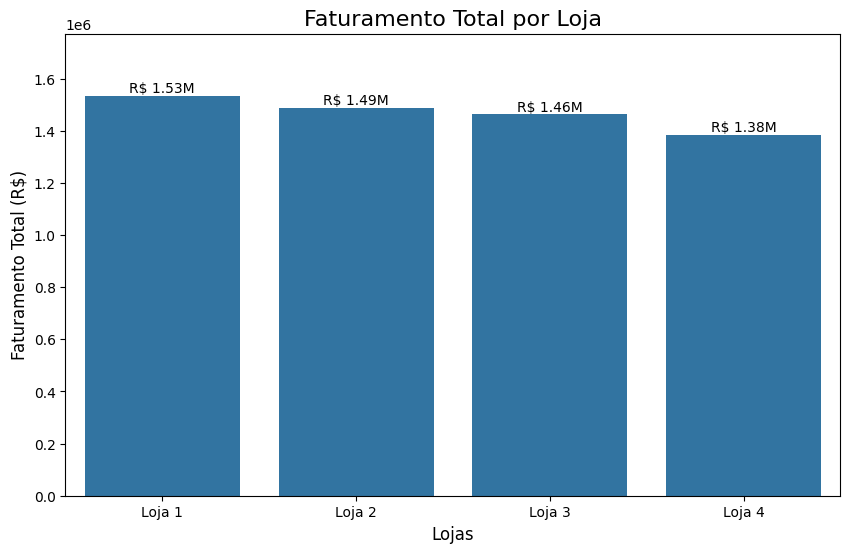

In [8]:
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=faturamento_lojas, 
    x='Loja_id', 
    y='faturamento_total'
)

ax.bar_label(
    ax.containers[0],  
    fmt=lambda v: f'R$ {v/1_000_000:.2f}M', # Formata o número
    fontsize=10,      
    color='black'    
)

ax.set_ylim(top=ax.get_ylim()[1] * 1.1)

plt.title('Faturamento Total por Loja', fontsize=16)
plt.xlabel('Lojas', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)

plt.show()

# 2. Vendas por Categoria

In [11]:

# Agrupa por categoria e SOMA o 'Preço' de cada venda
faturamento_por_categoria = df_lojas.groupby('Categoria do Produto')['Preço'].sum().reset_index(name='faturamento_total').sort_values('faturamento_total', ascending=False)

display(faturamento_por_categoria.style.format(
    {'faturamento_total': '{:,.2f}'},
    thousands='.',                      
    decimal=','                         
))

,Categoria do Produto,faturamento_total
2,eletronicos,"2.214.099,72"
1,eletrodomesticos,"1.766.337,03"
6,moveis,"1.010.214,00"
4,instrumentos musicais,"465.029,67"
3,esporte e lazer,"190.635,39"
0,brinquedos,"98.140,86"
7,utilidades domesticas,"76.773,38"
5,livros,"50.260,74"


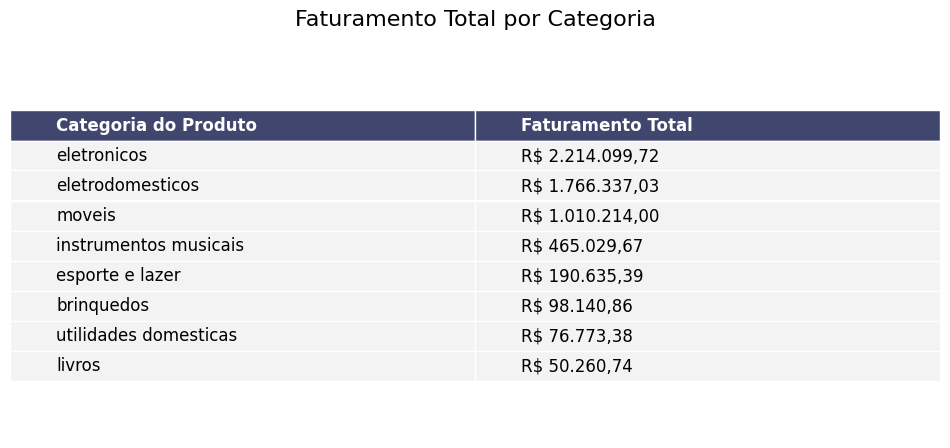

In [13]:
# Definir os rótulos das colunas
col_labels = ['Categoria do Produto', 'Faturamento Total']

# 3. Criar o gráfico de tabela
fig, ax = plt.subplots(figsize=(10, 5)) 
ax.axis('tight')
ax.axis('off') 

# Criar o objeto da tabela
the_table = ax.table(cellText=cell_text,
                     colLabels=col_labels,
                     loc='center',       
                     cellLoc='left',     
                     colLoc='left')      

# 4. Estilizar a tabela
the_table.auto_set_font_size(False)
the_table.set_fontsize(12)
the_table.scale(1.2, 1.8) #

# Estilizar as células
for (i, j), cell in the_table.get_celld().items():
    if i == 0: 
        cell.set_text_props(weight='bold', color='white')
        cell.set_facecolor('#40466e') 
    else: # Linhas de dados
        cell.set_facecolor('#f3f3f3') 
    cell.set_edgecolor('w') 

# Adicionar um título
ax.set_title('Faturamento Total por Categoria', fontsize=16, pad=20)
plt.show()

In [ ]:
# Calucula a porcentagem de cada categoria no faturamento total
soma_total = faturamento_por_categoria['faturamento_total'].sum()
faturamento_por_categoria['porcentagem'] = (faturamento_por_categoria['faturamento_total'] / soma_total) * 100
display(faturamento_por_categoria[['Categoria do Produto', 'porcentagem']].sort_values('porcentagem', ascending=False).round(2))

,Categoria do Produto,porcentagem
2,eletronicos,37.71
1,eletrodomesticos,30.08
6,moveis,17.21
4,instrumentos musicais,7.92
3,esporte e lazer,3.25
0,brinquedos,1.67
7,utilidades domesticas,1.31
5,livros,0.86


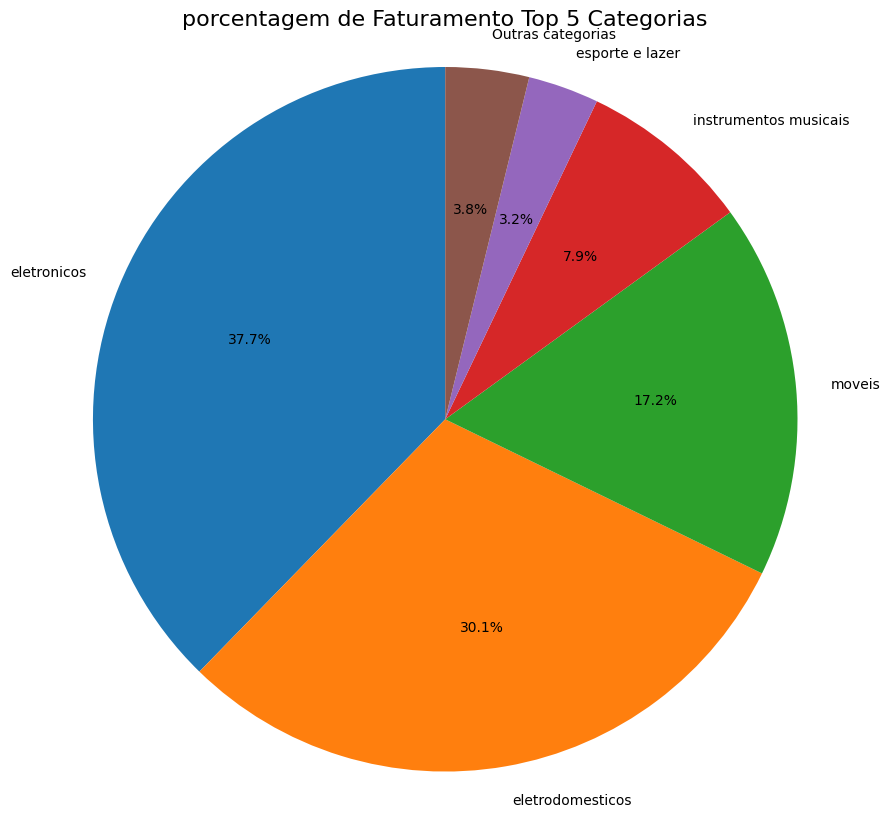

In [ ]:

df_top5 = faturamento_por_categoria.head(5).copy()
# Calcular o faturamento de "Outros"
soma_outros = faturamento_por_categoria.iloc[5:]['faturamento_total'].sum()

# Descobrir quantas categorias estão em "Outros"
num_outros = len(faturamento_por_categoria) - 5
label_outros = f'Outras categorias'

# Criar um DataFrame para a fatia "Outros"
df_outros = pd.DataFrame({
    'Categoria do Produto': [label_outros],
    'faturamento_total': [soma_outros]
})

df_para_pizza = pd.concat([df_top5, df_outros])


labels = df_para_pizza['Categoria do Produto']
valores = df_para_pizza['faturamento_total']


plt.figure(figsize=(10, 10))
plt.pie(
    valores, 
    labels=labels, 
    autopct='%1.1f%%',  
    startangle=90       
)
plt.title('porcentagem de Faturamento Top 5 Categorias', fontsize=16)
plt.axis('equal')
plt.show()

# 3. Média de Avaliação das Lojas


In [11]:
#  Média de avaliação
avaliacao_media = df_lojas.groupby('Loja_id')['Avaliação da compra'].mean().reset_index(name='media_avaliacao').sort_values('media_avaliacao', ascending=False).round(2)

display(avaliacao_media)

,Loja_id,media_avaliacao
2,Loja 3,4.05
1,Loja 2,4.04
3,Loja 4,4.00
0,Loja 1,3.98


In [12]:
# Agrupa por categoria e calcula a avaliação média
avaliacao_por_categoria = df_lojas.groupby('Categoria do Produto')['Avaliação da compra'].mean().reset_index().sort_values('Avaliação da compra', ascending=False).round(2)

display(avaliacao_por_categoria)

,Categoria do Produto,Avaliação da compra
0,brinquedos,4.07
6,moveis,4.03
1,eletrodomesticos,4.01
5,livros,4.00
4,instrumentos musicais,4.00
2,eletronicos,3.99
3,esporte e lazer,3.99
7,utilidades domesticas,3.98


# 4. Produtos Mais e Menos Vendidos

In [13]:
# Agrupa as vendas de todas as lojas por categoria
categorias_geral = df_lojas.groupby('Categoria do Produto').size().reset_index(name='vendas_totais').sort_values('vendas_totais', ascending=False)

display(categorias_geral)


,Categoria do Produto,vendas_totais
6,moveis,1886
2,eletronicos,1772
0,brinquedos,1290
1,eletrodomesticos,1149
3,esporte e lazer,1113
4,instrumentos musicais,753
5,livros,742
7,utilidades domesticas,730


# 5. Frete Médio por Loja

In [44]:
# 6. Custo médio de frete
frete_medio = df_lojas.groupby('Loja_id')['Frete'].mean().reset_index(name='custo_medio_frete').sort_values('custo_medio_frete', ascending=False).round(2)

display(frete_medio)

,Loja_id,custo_medio_frete
0,Loja 1,34.69
1,Loja 2,33.62
2,Loja 3,33.07
3,Loja 4,31.28


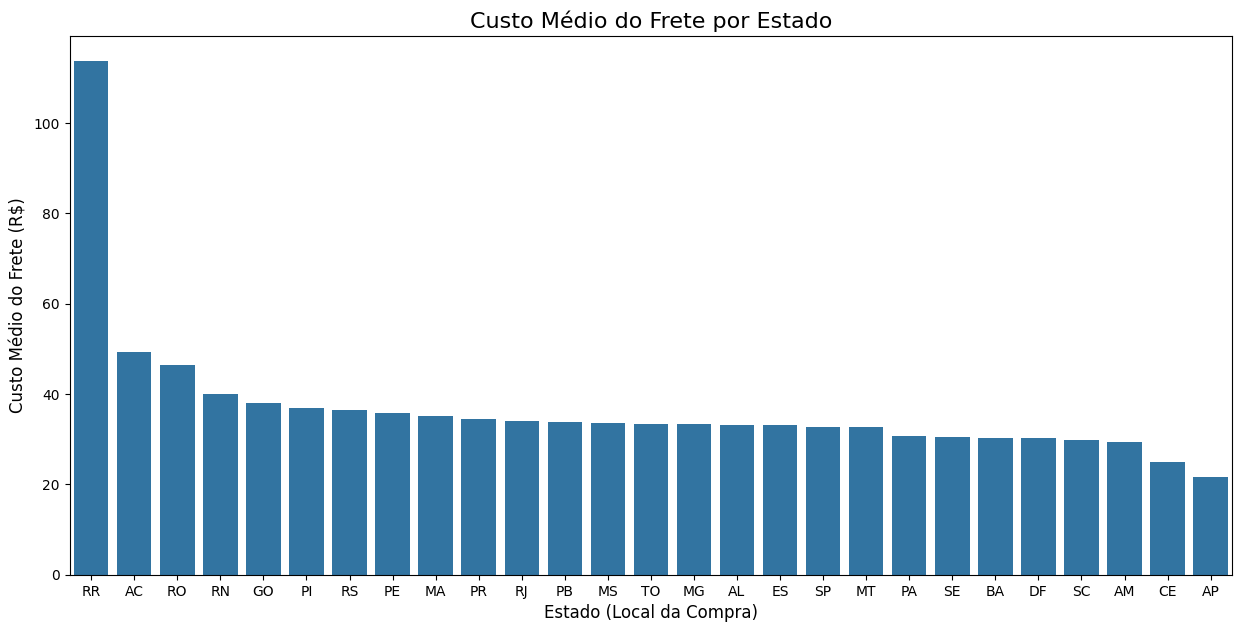

In [ ]:
# Agrupa por Local da compra e calcula a MÉDIA do Frete
frete_por_estado = df_lojas.groupby('Local da compra')['Frete'].mean().reset_index()

frete_por_estado_sorted = frete_por_estado.sort_values('Frete', ascending=False)

plt.figure(figsize=(15, 7))
sns.barplot(
    data=frete_por_estado_sorted,
    x='Local da compra',
    y='Frete'
)


plt.title('Custo Médio do Frete por Estado', fontsize=16)
plt.xlabel('Estado (Local da Compra)', fontsize=12)
plt.ylabel('Custo Médio do Frete (R$)', fontsize=12)
plt.show()

# Análise de Zazonalidade

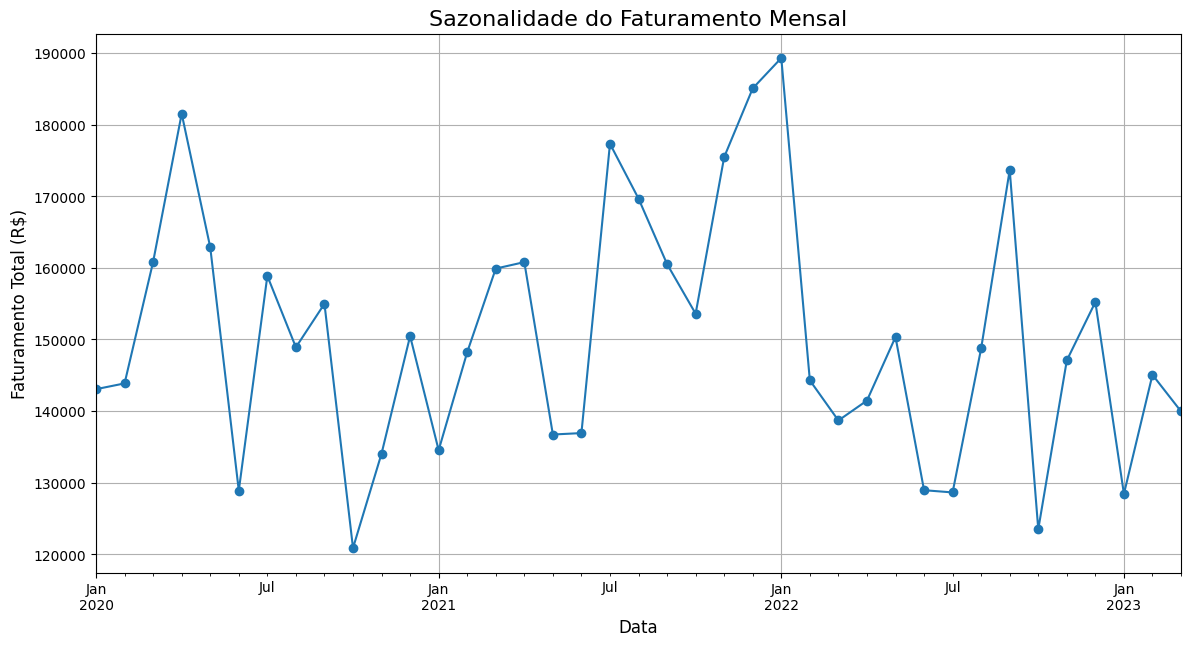

In [ ]:
# Análise de Sazonalidade - Faturamento Mensal
df_temporal = df_lojas.set_index('Data da Compra')
faturamento_mensal = df_temporal['Preço'].resample('M').sum()

plt.figure(figsize=(14, 7))
faturamento_mensal.plot(kind='line', marker='o')
plt.title('Sazonalidade do Faturamento Mensal', fontsize=16)
plt.xlabel('Data', fontsize=12)
plt.ylabel('Faturamento Total (R$)', fontsize=12)
plt.grid(True)
plt.show()

# Relatório de Desempenho da Rede AluraStore

**Fonte de dados:** DataFrame `df_lojas` consolidando **9.435 vendas** das quatro lojas da rede.  
**Objetivo:** Avaliar o desempenho financeiro e operacional para subsidiar uma decisão estratégica sobre a venda de uma das lojas.

---

## 1. Faturamento Total por Loja

O **faturamento** é a principal métrica de desempenho financeiro.

| Loja | Faturamento Total | Posição |
|:------|:-----------------:|:--------:|
| Loja 1 | **R$ 1.534.509,12** | 1º |
| Loja 2 | **R$ 1.488.459,06** | 2º |
| Loja 3 | **R$ 1.464.025,03** | 3º |
| Loja 4 | **R$ 1.384.497,58** | 4º |

**Conclusão:**  
A **Loja 4** apresenta o pior desempenho financeiro, faturando aproximadamente **<span style="color:#d62728; font-weight:bold;">R$ 150.000 inferior</span>** que a Loja 1 (uma diferença de quase 11%).

---

## 2. Média de Avaliação dos Clientes

Análise da satisfação dos clientes:

- **Melhor Avaliação:** Loja 3 – **4.05**
- **Pior Avaliação:** Loja 1 – **3.98**
- **Loja 4:** Avaliação intermediária – **4.00**

**Análise:**  
Apesar de menor faturamento, a Loja 4 mantém uma **boa percepção dos clientes**, enquanto a Loja 1, líder em vendas, apresenta **a menor média de satisfação**.

---

## 3. Custo Médio do Frete por Loja

O custo logístico afeta diretamente a lucratividade da operação.

| Loja | Custo Médio de Frete |
|:------|:------------------:|
| Loja 1 | **R$ 34,69** |
| Loja 2 | R$ 33,17 |
| Loja 3 | R$ 32,58 |
| Loja 4 | **R$ 31,28** |

**Análise:**  
A **Loja 4** possui o **frete mais barato**, demonstrando **eficiência logística**.  
Já a **Loja 1** apresenta o **frete mais caro**, reduzindo suas margens.

---

## 4. Análise de Categorias e Produtos (Nível Rede)

A performance por categoria e produto revela os principais motores de receita.

### Faturamento por Categoria
| Categoria | Participação no Faturamento |
|:------------|:--------------------------:|
| Eletrônicos | **37,7%** |
| Eletrodomésticos | **30,1%** |
| Móveis | **17,2%** |

> **Observação:** Essas três categorias somam **<span style="color:#1f77b4; font-weight:bold;">85% da receita total</span>** da rede.

### Volume de Unidades Vendidas
| Categoria | Unidades Vendidas |
|:------------|:----------------:|
| Móveis | **1.886** |
| Eletrônicos | 1.772 |
| Brinquedos | 1.290 |

**Interpretação:**  
Itens de **alto valor agregado** (como eletrônicos e eletrodomésticos) impulsionam o faturamento,  
enquanto **móveis** se destacam em volume de vendas.

---

## 5. Cenários Estratégicos

Com base nas métricas financeiras e operacionais, foram definidos dois cenários possíveis.

### Cenário 1 – Vender a Loja de Pior Desempenho 

- **Recomendação:** Vender a **Loja 4**  
- **Justificativa:** É o ativo de **menor receita** da rede.  
  A venda reduziria o impacto financeiro global e liberaria capital de forma estratégica.  
- **Ponto de Atenção:** Possui **frete mais barato** e **avaliação satisfatória**.

---

### Cenário 2 – Vender a Loja de Maior Desafios Operacionais 

- **Alternativa:** Vender a **Loja 1**  
- **Justificativa:** Se o objetivo for **maximizar o retorno financeiro imediato**,  
  a Loja 1 tem o **maior faturamento (R$ 1,53M)** e, portanto, **maior valor de mercado**.  
- **Ponto de Atenção:** É também a loja com **maior custo de frete**  
  e **pior avaliação de clientes**, o que pode indicar desafios operacionais.

---

## Recomendação Final

Após consolidar todas as análises:

> A decisão mais segura e racional é **vender a Loja 4**.

- A Loja 4 apresenta o **menor faturamento (R$ 1,38M)**.  
- Sua saída causará o **menor impacto na receita total**.  
- A decisão **otimiza o portfólio**, **reduz custos** e **permite reinvestimento em operações mais rentáveis**.

---

### Resumo Executivo

| Indicador | Melhor Loja | Pior Loja |
|:------------|:--------------|:-------------|
| Faturamento Total | Loja 1 (R$ 1,53M) | Loja 4 (R$ 1,38M) |
| Avaliação de Clientes | Loja 3 (4.05) | Loja 1 (3.98) |
| Custo Médio de Frete | Loja 4 (R$ 31,28) | Loja 1 (R$ 34,69) |

---
